__Домашняя работа 8.__

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import mutual_info_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

from matplotlib.colors import ListedColormap

In [2]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [3]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [4]:
def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


def visualize(train_data, test_data, train_answers):
    light_colors = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    colors = ListedColormap(['red', 'green', 'blue'])
    plt.figure(figsize = (16, 7))

    # график обучающей выборки
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh = dt2.predict(np.c_[xx.ravel(), yy.ravel()])
    #mesh_predictions = np.array(predict(np.c_[xx.ravel(), yy.ravel()], my_tree)).reshape(xx.shape)
    mesh_predictions = mesh.reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors, shading='auto')
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
    plt.title(f'Train accuracy={train_accuracy_pca:.2f}')

    # график тестовой выборки
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors, shading='auto')
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
    plt.title(f'Test accuracy={test_accuracy_pca:.6f}')

__Задание 1.__ Обучить любую модель классификации на датасете IRIS до применения самописного PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.

In [5]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Для начала отмасштабируем выборку
X = X.astype(float)

X = standard_scale(X)

In [8]:
# Разобьем на тренировочную и тестовую выборки
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                                                                    test_size=0.3,
                                                                    random_state=1)

In [9]:
X.shape

(150, 4)

__до PCA__

In [10]:
# Обучими модель и сделаем предсказание по 4 признакам
dt = BaggingClassifier()
dt.fit(train_data, train_labels)

train_answers = dt.predict(train_data)
test_answers = dt.predict(test_data)

train_accuracy = accuracy_score(train_labels, train_answers)
test_accuracy = accuracy_score(test_labels, test_answers)

print(f'Train accuracy', train_accuracy)
print(f'Test accuracy', test_accuracy)

Train accuracy 1.0
Test accuracy 0.9555555555555556


In [11]:
train_answers.shape

(105,)

__PCA__

In [12]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(437.77467247979865, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.1045707202106, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.013531335697223, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642929384, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [13]:
# Оценим долю дисперсии, которая описывается найденными компонентами.
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329986, 22.850761786701792, 3.6689218892828745, 0.5178709107154903]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [14]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [15]:
# Сформируем новую матрицу "объекты-признаки"
Z = X.dot(W)

In [16]:
Z.shape

(150, 2)

In [17]:
# Разобьем на тренировочную и тестовую выборки
train_data_pca, test_data_pca, train_labels_pca, test_labels_pca = train_test_split(Z, y, 
                                                                                    test_size=0.3,
                                                                                    random_state=1)

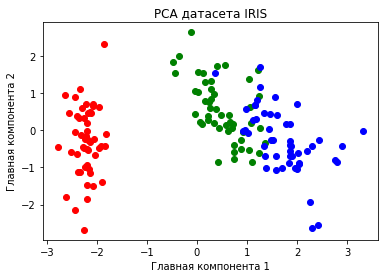

In [18]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [19]:
# Обучими модель и сделаем предсказание по 2 признакам
dt2 = BaggingClassifier()
dt2.fit(train_data_pca, train_labels_pca)

train_answers_pca = dt2.predict(train_data_pca)
test_answers_pca = dt2.predict(test_data_pca)

train_accuracy_pca = accuracy_score(train_labels_pca, train_answers_pca)
test_accuracy_pca = accuracy_score(test_labels_pca, test_answers_pca)

print(f'Train accuracy', train_accuracy_pca)
print(f'Test accuracy', test_accuracy_pca)

Train accuracy 0.9904761904761905
Test accuracy 0.9333333333333333


In [20]:
xx, yy = get_meshgrid(train_data_pca)
xx.shape

(155, 170)

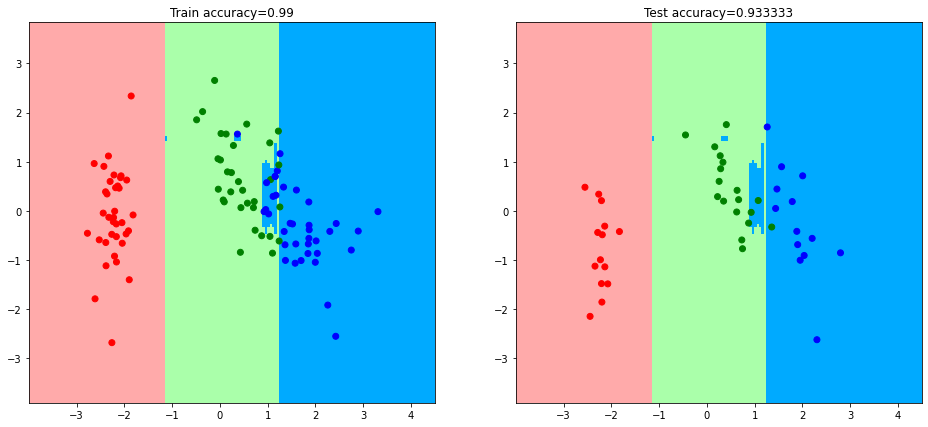

In [21]:
visualize(train_data_pca, test_data_pca, train_answers_pca)

__Выводы:__

In [25]:
print(f'Train accuracy', train_accuracy)
print(f'Test accuracy', test_accuracy)
print(f'Train accuracy_pca', train_accuracy_pca)
print(f'Test accuracy_pca', test_accuracy_pca)

Train accuracy 1.0
Test accuracy 0.9555555555555556
Train accuracy_pca 0.9904761904761905
Test accuracy_pca 0.9333333333333333


Метрика упала всего на 2%, что незначительно. При этом данные стало просто визуализировать. Работать с двумя признаками куда проще чем с четырмя. 